#Solving a First Order ODE with Euler and Runge-Kutta Methods

In [70]:
import numpy as np
import matplotlib.pyplot as plt

The aim is to find $x(2
)$, given:
$$\frac{dx}{dt}=t-x^2$$
Subject to the initial condition $x(0)=0$

## Euler Method
$$x_{n+1}=x_n+f(x_n,t_n)\Delta t$$

In [78]:
dt = 0.5
N = 5
t = np.linspace(0,N*dt,num=N)
x = np.zeros(N)

def f(x,t):
  return t-x**2

for i in range(len(t)-1):
  x[i+1] = x[i]+f(x[i],t[i])*dt

x_euler = x.copy()

## RK2 Method
$$x_{k+1}=x_k+f\left(x_k+\frac{1}{2}f(x_k,t_k)\Delta t,t_k+\frac{1}{2}\Delta t\right)\Delta t$$

In [79]:
dt = 0.5
N = 5
t = np.linspace(0,N*dt,num=N)
x = np.zeros(N)

def f(x,t):
  return t-x**2

for i in range(len(t)-1):
  x[i+1] = x[i]+f(x[i]+0.5*f(x[i],t[i])*dt,t[i]+0.5*dt)*dt

x_rk2=x.copy()

#RK4 Method
$$x_{k+1}=x_k+\frac{1}{6}\Delta t\left[s_1+2s_2+2s_3+s4\right]\\~\\s_1=f(x_k,t_k)\\s_2=f\left(x_k+\frac{1}{2}\Delta ts_1,t_k+\frac{1}{2}\Delta t\right)\\s_3=f\left(x_k+\frac{1}{2}\Delta ts_2,t_k+\frac{1}{2}\Delta t\right)\\s_4=f\left(x_k+\Delta ts_3,t_k+\Delta t\right)$$

In [80]:
dt = 0.5
N = 5
t = np.linspace(0,N*dt,num=N)
x = np.zeros(N)

def f(x,t):
  return t-x**2

for i in range(len(t)-1):
  s1 = f(x[i],t[i])
  s2 = f(x[i]+0.5*dt*s1, t[i]+0.5*dt)
  s3 = f(x[i]+0.5*dt*s2,t[i]+0.5*dt)
  s4 = f(x[i]+dt*s3, t[i]+dt)
  x[i+1] = x[i]+(1/6)*(s1+2*s2+2*s3+s4)*dt

x_rk4 = x.copy()

## True Function for Comparison (just using RK4 with small $\Delta t$)

In [82]:
dt = 0.01
N = 200
t = np.linspace(0,N*dt,num=N)
x = np.zeros(N)

def f(x,t):
  return t-x**2

for i in range(len(t)-1):
  s1 = f(x[i],t[i])
  s2 = f(x[i]+0.5*dt*s1, t[i]+0.5*dt)
  s3 = f(x[i]+0.5*dt*s2,t[i]+0.5*dt)
  s4 = f(x[i]+dt*s3, t[i]+dt)
  x[i+1] = x[i]+(1/6)*(s1+2*s2+2*s3+s4)*dt

x_true = x.copy()

## Comparison

Text(0.5, 1.0, 'Solving $\\frac{dx}{dt}=t-x^2$ Numerically')

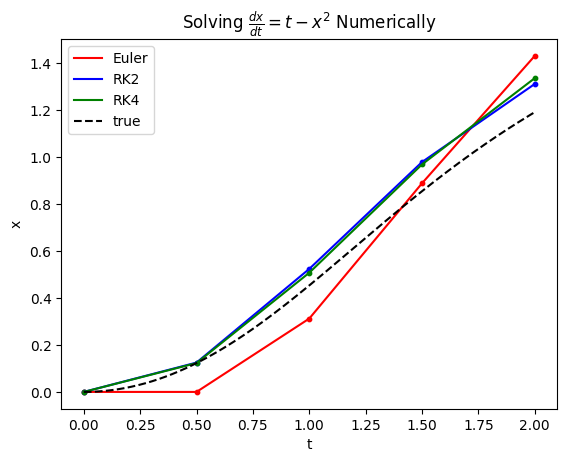

In [90]:
t_5 = np.linspace(0,2,num=5)
t_200 = np.linspace(0,2,num=200)

plt.scatter(t_5,x_euler, s=10,color='red')
plt.plot(t_5,x_euler,label='Euler',color='red')
plt.scatter(t_5,x_rk2, s=10,color='blue')
plt.plot(t_5,x_rk2, label='RK2',color='blue')
plt.scatter(t_5,x_rk4, s=10,color='green')
plt.plot(t_5,x_rk4, label='RK4',color='green')
plt.plot(t_200,x_true, label='true',color='black',linestyle='--')
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.title(r'Solving $\frac{dx}{dt}=t-x^2$ Numerically')